In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from matplotlib.lines import Line2D
from geopy.distance import geodesic

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats

from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec

import cmocean
import cmocean.cm as cmo
import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df_o2 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/O2_Summary_Stats.csv', sep=',', index_col=0)
df_riv = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/river_discharge_date.csv', sep=',', index_col=0)

flux_cdom_bc_350 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_bc_350.csv', sep=',', index_col=0)
flux_cdom_bc_412 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_bc_412.csv', sep=',', index_col=0)

flux_cdom_pw_350 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_350.csv', sep=',', index_col=0)
flux_cdom_pw_412 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_412.csv', sep=',', index_col=0)
flux_cdom_pw_320 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_320.csv', sep=',', index_col=0)
flux_cdom_pw_450 = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_cdom_pw_450.csv', sep=',', index_col=0)


flux_doc_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_bc.csv', sep=',', index_col=0)
flux_doc_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_pw.csv', sep=',', index_col=0)

flux_tn_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_bc.csv', sep=',', index_col=0)
flux_tn_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_tn_pw.csv', sep=',', index_col=0)

flux_fe2_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_bc.csv', sep=',', index_col=0)
flux_fe2_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe2_pw.csv', sep=',', index_col=0)
flux_fe3_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_bc.csv', sep=',', index_col=0)
flux_fe3_pw = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_fe3_pw.csv', sep=',', index_col=0)

fe_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Iron_stocks.csv', sep=',', index_col=0)
doc_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/DOC_stocks.csv', sep=',', index_col=0)


flux_inflection_bc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_inflection_bc.csv', sep=',', index_col=0)

ncs_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv', sep=',', index_col=0)
wc_doc_stocks = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Water_col_DOC_stocks.csv', sep=',', index_col=0)

dic_flux = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/GOM_DIC_BFLUX_03052024.csv')
dic_flux['code'] = dic_flux['Stn'] + '_' + dic_flux['camp']
dic_flux.index = dic_flux['code']

################################


flux_cdom_bc_412_join = flux_cdom_bc_412['bc_flux_aCDOM412']
flux_cdom_bc_350_join = flux_cdom_bc_350['bc_flux_aCDOM350']

flux_cdom_pw_350_join = flux_cdom_pw_350['pw_flux_aCDOM350']
flux_cdom_pw_412_join = flux_cdom_pw_412['pw_flux_aCDOM412']
flux_cdom_pw_320_join = flux_cdom_pw_320['pw_flux_aCDOM320']
flux_cdom_pw_450_join = flux_cdom_pw_450['pw_flux_aCDOM450']


flux_doc_bc_join = flux_doc_bc['bc_flux_doc']

flux_doc_pw_join = flux_doc_pw['pw_flux_doc']
flux_doc_pw_error_join = flux_doc_pw['pw_flux_doc_error']

flux_tn_bc_join = flux_tn_bc['bc_flux_tn']

flux_tn_pw_join = flux_tn_pw['pw_flux_tn']
flux_tn_pw_error_join = flux_tn_pw['pw_flux_tn_error']

flux_fe2_bc_join = flux_fe2_bc['bc_flux_fe2']

flux_fe2_pw_join = flux_fe2_pw['pw_flux_fe2']
flux_fe2_pw_error_join = flux_fe2_pw['pw_flux_fe2_error']

flux_fe3_bc_join = flux_fe3_bc['bc_flux_fe3']

flux_fe3_pw_join = flux_fe3_pw['pw_flux_fe3']
flux_fe3_pw_error_join = flux_fe3_pw['pw_flux_fe3_error']

flux_dic_bc_join = dic_flux['dic_flux']


fe_stocks_join = fe_stocks
df_riv = df_riv.drop(columns=['date'])
doc_stocks_join = doc_stocks

df = df_o2.join(ncs_stocks)
df = df.join(df_riv)
df = df.join(fe_stocks_join)
df = df.join(doc_stocks_join)
df = df.join(wc_doc_stocks)
df = df.join(flux_inflection_bc)

df = df.join(flux_cdom_bc_412_join)
df = df.join(flux_cdom_pw_412_join)

df = df.join(flux_cdom_pw_450_join)
df = df.join(flux_cdom_pw_320_join)

df = df.join(flux_cdom_bc_350_join)
df = df.join(flux_cdom_pw_350_join)

df = df.join(flux_doc_bc_join)
df = df.join(flux_doc_pw_join)
df = df.join(flux_doc_pw_error_join)

df = df.join(flux_tn_bc_join)
df = df.join(flux_tn_pw_join)
df = df.join(flux_tn_pw_error_join)

df = df.join(flux_fe2_bc_join)
df = df.join(flux_fe2_pw_join)
df = df.join(flux_fe2_pw_error_join)

df = df.join(flux_fe3_bc_join)
df = df.join(flux_fe3_pw_join)
df = df.join(flux_fe3_pw_error_join)

df = df.join(flux_dic_bc_join)


df['Camp'] = df["camp"]
df['Stn'] = df["station"]
df = df.drop(columns=['code.1'])

df['rgn'] = 'default'

df.loc[df['station'].isin(['St.2', 'St.16', 'St.16-2']), 'rgn'] = 'riv'
df.loc[df['station'].isin(['St.5B', 'St.MK', 'St.MK-2', 'St.ML', 'St.4', 'St.6']), 'rgn'] = 'hypox'
df.loc[df['station'].isin(['St.7', 'St.9', 'St.14', 'St.14.5']), 'rgn'] = 'shelf'
df.loc[df['station'].isin(['St.11', 'St.12', 'St.13', 'St.15']), 'rgn'] = 'slope'

df['season'] = 'default'

df.loc[df['camp'].isin(['GOM21FA']), 'season'] = 'fall'
df.loc[df['camp'].isin(['GOM22SU', 'GOM2021']), 'season'] = 'summer'
df.loc[df['camp'].isin(['GOM22SP']), 'season'] = 'spring'

df['OCkg_5cm_deep_M3'] = df['OCg_5cm_deep/M2'] / 1000

df['Date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['Date'].dt.dayofyear

df['Fe2_m3'] = df['fe2_mol_per_m3_0_to_25cm']
df['Fe3_m3'] = df['fe3_mol_per_m3_0_to_25cm']

df['Fe2_m3_top'] = df['fe2_mol_per_m3_0_to_5cm']
df['Fe3_m3_top'] = df['fe3_mol_per_m3_0_to_5cm']

# Function to calculate distance
def calculate_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (29.14805833, -89.24593056)  # Coordinates of delta
    return geodesic(start, end).kilometers

# Function to calculate distance
def calculate_lat_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (29.14805833, row['longitude_bottom'])  
    return geodesic(start, end).kilometers

# Function to calculate distance
def calculate_lon_distance(row):
    start = (row['latitude_bottom'], row['longitude_bottom'])
    end = (row['latitude_bottom'], -89.24593056)  
    return geodesic(start, end).kilometers

# Apply function to create new column
df['distance_to_delta_km'] = df.apply(calculate_distance, axis=1)
df['distance_to_delta_lat_km'] = df.apply(calculate_lat_distance, axis=1)
df['distance_to_delta_lon_km'] = df.apply(calculate_lon_distance, axis=1)

ncs_stocks['OCmol_5cm_deepM3'] = ncs_stocks['OCg_5cm_deep/M2'] / 12 

df.to_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_Stock_O2_summary.csv')

In [3]:
df_riv.columns

Index(['discharge_mi_ftps', 'discharge_af_ftps', 'discharge_mi_ftps_seven_day',
       'discharge_af_ftps_seven_day', 'discharge_mi_ftps_14_day',
       'discharge_mi_ftps_30_day', 'discharge_mi_ftps_60_day',
       'discharge_mi_ftps_90_day', 'discharge_af_ftps_14_day',
       'discharge_af_ftps_30_day', 'discharge_af_ftps_60_day',
       'discharge_af_ftps_90_day'],
      dtype='object')

In [4]:

data_wc = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/data_wc.csv')

data_wc.loc[data_wc['pw_flux_doc'] > 25, 'pw_flux_doc'] = np.nan
data_wc['ratio_flux_2_stock'] = data_wc['pw_flux_doc'] / data_wc['doc_mol_per_m3_0_to_5cm']

n = 0.29
data_wc['Cox'] = data_wc['pw_flux_doc'] / 0.36
data_wc['Cox'] = data_wc['Cox'] ** (1/n)

data_wc['ratio_pw_flux_doc_2_cox'] = data_wc['pw_flux_doc'] / data_wc['Cox']

data_wc['ratio_doc_2_fet'] = data_wc['doc_mol_per_m3_0_to_5cm'] / data_wc['fet_mol_per_m3_0_to_25cm']
data_wc['ratio_oc_2_fet'] = data_wc['OC_mol_per_m3_0_to_5cm'] / data_wc['fet_mol_per_m3_0_to_5cm']


data_wc['group'] == "water_col"
data_wc['group']


# Define a function to assign group
def assign_group(df):
    max_depth_index = df['Depth'].idxmax()
    df.loc[df['Depth'] <= 5, 'group'] = 'Surface'
    df.loc[max_depth_index, 'group'] = 'BBL'
    return df

# Apply the function within groups
data_wc = data_wc.groupby(['Campaign', 'Location']).apply(assign_group).reset_index(drop=True)


data_wc['group'].unique()

data_wc_all = data_wc


df_note = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Station_summary.csv',sep=',', index_col=0)
df_note['Date'] = pd.to_datetime(df_note['date'])
note_join = df_note['rgn']


data_wc_all['code'] = data_wc_all['Location'] + '_' + data_wc_all['Campaign']
data_wc_all.index = data_wc_all['code']
data_wc_all['rgn'] = note_join

data_wc_bbl = data_wc_all[data_wc_all['group'] == "BBL"]
data_wc_surf = data_wc_all[data_wc_all['group'] == "Surface"]
data_wc = data_wc_all[data_wc_all['group'] == "water_col"]

data_wc_bbl

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_472\71446043.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_wc = data_wc.groupby(['Campaign', 'Location']).apply(assign_group).reset_index(drop=True)


,code,Press,ox,temp,sal,NPOC_uM,Depth,Campaign,Location,Ts,...,doc_mol_per_m3_0_to_5cm,OC_mol_per_m3_0_to_5cm,pw_flux_doc,Cox,percent_doc_resp,ratio_flux_2_stock,ratio_pw_flux_doc_2_cox,ratio_doc_2_fet,ratio_oc_2_fet,rgn
code,,,,,,,,,,,,,,,,,,,,,
St.11_GOM2021,St.11_GOM2021,946.000,250.6848,5.1116,34.9340,106.625000,946.0,GOM2021,St.11,0.051742,...,0.923105,NaN,2.277446,578.856789,127.328283,2.467158,0.003934,39.698806,NaN,Slope
St.13_GOM2021,St.13_GOM2021,321.519,178.8448,11.2036,35.3737,55.552083,322.0,GOM2021,St.13,0.009077,...,NaN,NaN,NaN,NaN,44.481915,NaN,NaN,NaN,NaN,Slope
St.14_GOM2021,St.14_GOM2021,89.886,173.2896,19.1130,36.4274,70.231250,89.9,GOM2021,St.14,-0.046310,...,0.340952,NaN,1.147054,54.381730,91.481259,3.364268,0.021093,11.250685,NaN,Shelf
St.15_GOM2021,St.15_GOM2021,284.991,173.4112,11.3402,35.3970,63.075000,285.0,GOM2021,St.15,0.008120,...,0.328016,NaN,10.964420,130661.843227,48.123885,33.426481,0.000084,10.626101,NaN,Slope
St.16_GOM2021,St.16_GOM2021,61.486,170.6848,20.7133,36.3439,122.979167,61.5,GOM2021,St.16,-0.057522,...,0.555662,NaN,12.783071,221806.793126,171.972827,23.005124,0.000058,9.956452,NaN,River Delta
St.2_GOM2021,St.2_GOM2021,62.185,161.7824,20.8984,36.3435,81.102083,62.2,GOM2021,St.2,-0.058819,...,0.436882,NaN,6.635362,23121.041390,98.232291,15.187983,0.000287,12.694059,NaN,River Delta
St.4_GOM2021,St.4_GOM2021,16.695,105.8688,27.7194,35.3618,85.760417,16.7,GOM2021,St.4,-0.106661,...,0.000000,NaN,NaN,NaN,67.490979,NaN,NaN,0.000000,NaN,Hypoxic Shelf
St.5B_GOM2021,St.5B_GOM2021,12.500,228.1792,28.7582,33.6376,113.666667,12.5,GOM2021,St.5B,-0.113956,...,0.000000,NaN,NaN,NaN,-279.845013,NaN,NaN,0.000000,NaN,Hypoxic Shelf
St.7_GOM2021,St.7_GOM2021,38.510,128.4736,24.3170,36.0532,116.520833,38.5,GOM2021,St.7,-0.082785,...,0.600673,NaN,11.408700,149841.919907,105.185501,18.993196,0.000076,31.862517,NaN,Shelf


In [5]:
# Identify duplicate columns
duplicate_columns = df.columns.intersection(data_wc_bbl.columns)

# Drop duplicate columns from data_wc_bbl
data_wc_bbl_deduped = data_wc_bbl.drop(columns=duplicate_columns)

# Combine the data frames
combined_df = pd.concat([df, data_wc_bbl_deduped], axis=1)

combined_df.columns

Index(['camp', 'station', 'date', 'Max_pressure', 'Pressure_dbar_surface',
       'O2_mgL_surface', 'latitude_surface', 'longitude_surface',
       'Pressure_dbar_bottom', 'O2_mgL_bottom',
       ...
       'group', 'aou-ceq', 'code.1', 'OC_mol_per_m3_0_to_5cm', 'Cox',
       'percent_doc_resp', 'ratio_flux_2_stock', 'ratio_pw_flux_doc_2_cox',
       'ratio_doc_2_fet', 'ratio_oc_2_fet'],
      dtype='object', length=121)

                            OLS Regression Results                            
Dep. Variable:            pw_flux_doc   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1.748
Date:                Mon, 17 Jun 2024   Prob (F-statistic):              0.125
Time:                        12:06:57   Log-Likelihood:                -93.008
No. Observations:                  36   AIC:                             208.0
Df Residuals:                      25   BIC:                             225.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

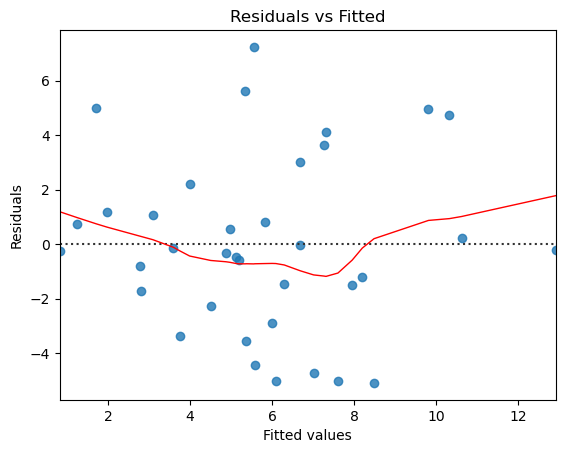

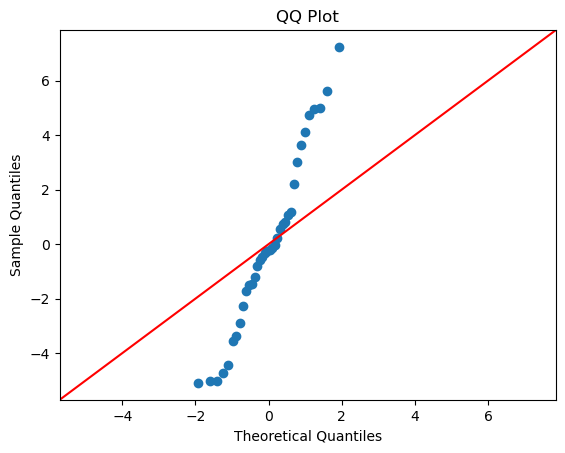

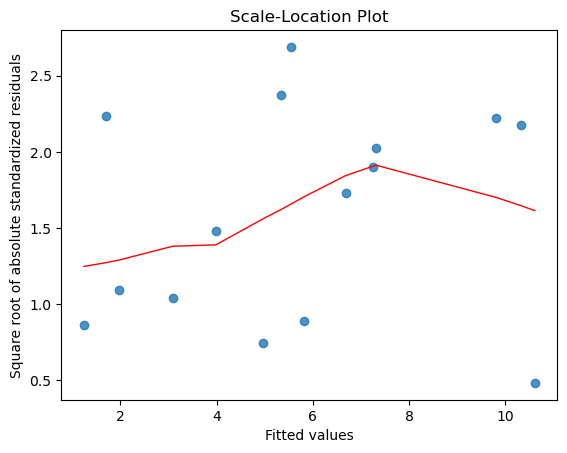

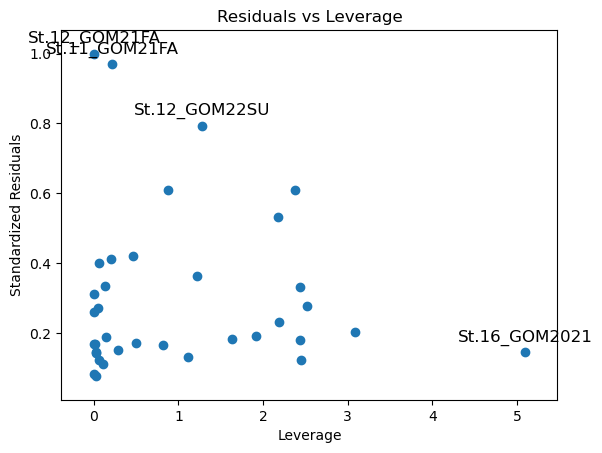

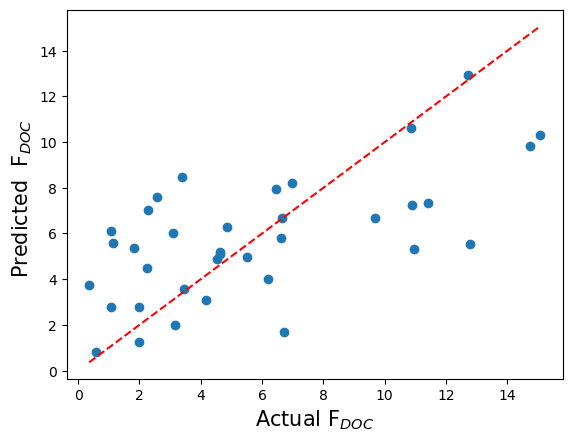

pw_flux_doc = 48.4518 * Intercept + -0.1454 * NPOC_uM + -0.1079 * aou + 0.0010 * NPOC_uM:aou + -0.0000 * discharge_mi_ftps_90_day + -72.9997 * doc_mol_per_m3_0_to_5cm + 0.0000 * discharge_mi_ftps_90_day:doc_mol_per_m3_0_to_5cm + -0.0271 * max_depth + 0.0000 * discharge_mi_ftps_90_day:max_depth + 0.0834 * doc_mol_per_m3_0_to_5cm:max_depth + -0.0000 * discharge_mi_ftps_90_day:doc_mol_per_m3_0_to_5cm:max_depth 


In [6]:
# Define the formula for linear regression

Val = 'pw_flux_doc'

formula = 'pw_flux_doc ~ NPOC_uM*aou+discharge_mi_ftps_90_day*doc_mol_per_m3_0_to_5cm*max_depth' 

#formula = 'pw_flux_doc ~ NPOC_uM+aou+doc_mol_per_m3_0_to_5cm+max_depth+distance_to_delta_lat_km' 

#percent_doc_resp ' #r=0.683 all ponits significant 
#NPOC_uM ' #r=0.707 CI 95 did not work 
#aou ' #r=0.619

df_OM = combined_df

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual F$_{DOC}$ ', size = 15)
plt.ylabel('Predicted  F$_{DOC}$  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Print out the equation nicely
print("pw_flux_doc =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()


                            OLS Regression Results                            
Dep. Variable:            pw_flux_doc   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     2.778
Date:                Mon, 17 Jun 2024   Prob (F-statistic):             0.0333
Time:                        12:06:59   Log-Likelihood:                -60.193
No. Observations:                  27   AIC:                             142.4
Df Residuals:                      16   BIC:                             156.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

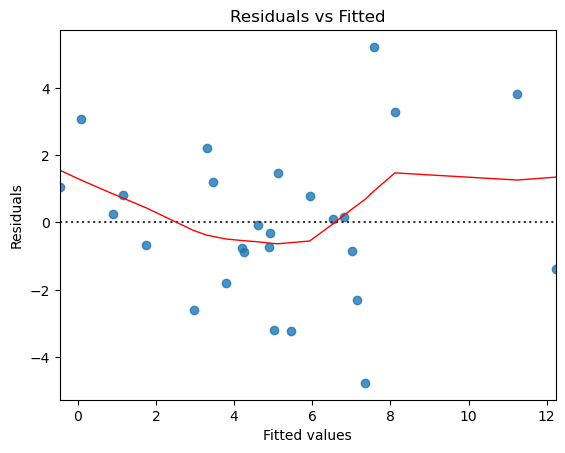

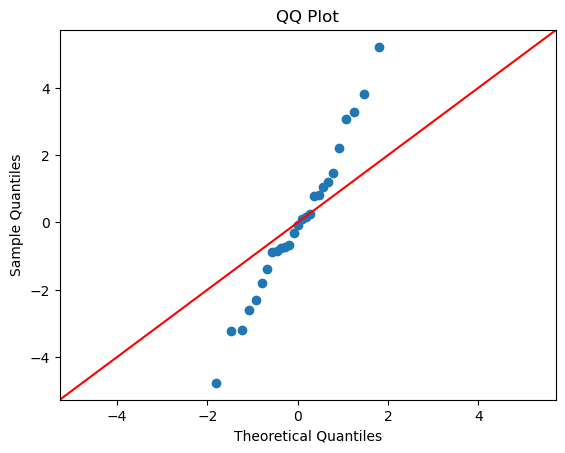

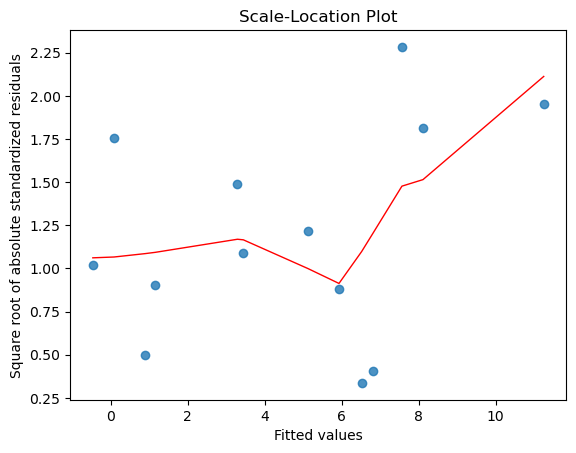

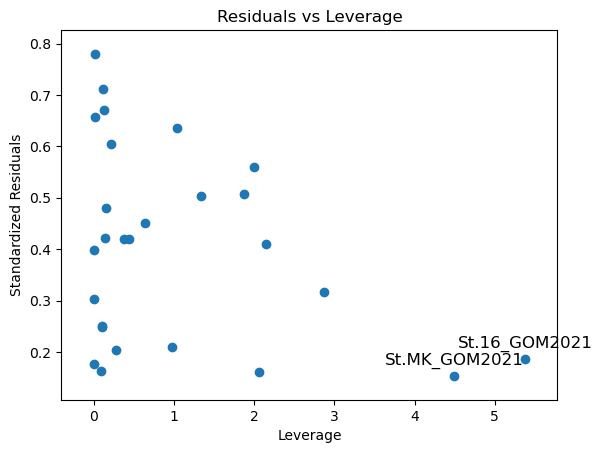

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_472\4101899094.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OM['pred'] = predicted


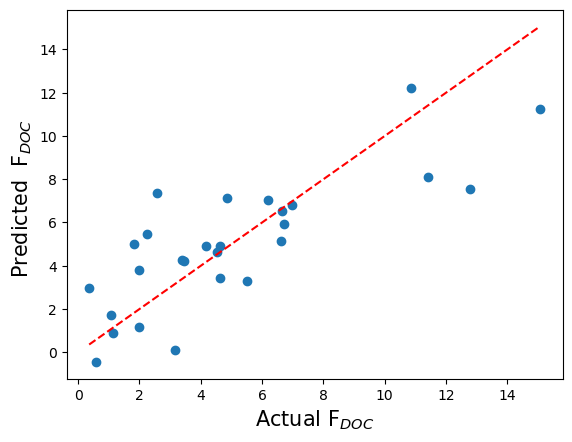

pw_flux_doc = -59.1267 * Intercept + -0.1101 * NPOC_uM + -0.1172 * aou + 0.0011 * NPOC_uM:aou + 0.0000 * discharge_mi_ftps_14_day + 2.1041 * distance_to_delta_lat_km + -0.0000 * discharge_mi_ftps_14_day:distance_to_delta_lat_km + 167.2711 * doc_mol_per_m3_0_to_5cm + -0.0000 * discharge_mi_ftps_14_day:doc_mol_per_m3_0_to_5cm + -4.6256 * distance_to_delta_lat_km:doc_mol_per_m3_0_to_5cm + 0.0000 * discharge_mi_ftps_14_day:distance_to_delta_lat_km:doc_mol_per_m3_0_to_5cm 


In [7]:
# Define the formula for linear regression

Val = 'pw_flux_doc'

formula = 'pw_flux_doc ~ NPOC_uM*aou+discharge_mi_ftps_14_day*distance_to_delta_lat_km*doc_mol_per_m3_0_to_5cm' 
#percent_doc_resp ' #r=0.683 all ponits significant 
#NPOC_uM ' #r=0.707 CI 95 did not work 
#aou ' #r=0.619

df_OM = combined_df[combined_df['rgn'] != 'slope']

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual F$_{DOC}$ ', size = 15)
plt.ylabel('Predicted  F$_{DOC}$  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Print out the equation nicely
print("pw_flux_doc =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()


                            OLS Regression Results                            
Dep. Variable:            pw_flux_doc   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     3.009
Date:                Mon, 17 Jun 2024   Prob (F-statistic):              0.111
Time:                        12:07:01   Log-Likelihood:                -25.934
No. Observations:                  11   AIC:                             61.87
Df Residuals:                       6   BIC:                             63.86
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      68.3439     20.631      3.313      

C:\Users\hmlbr\anaconda3\envs\bugs\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


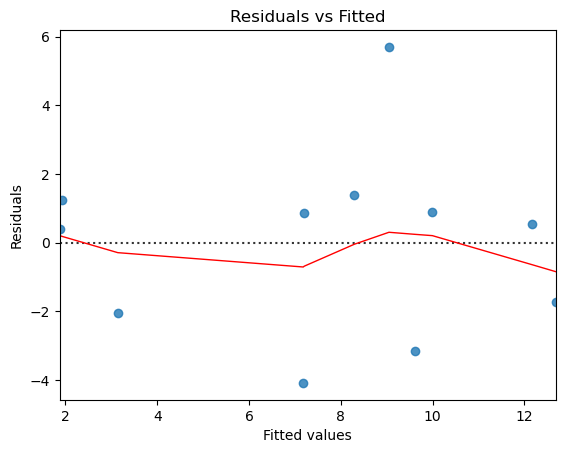

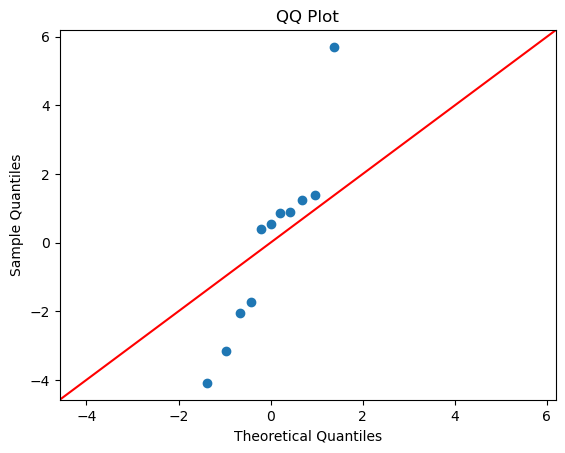

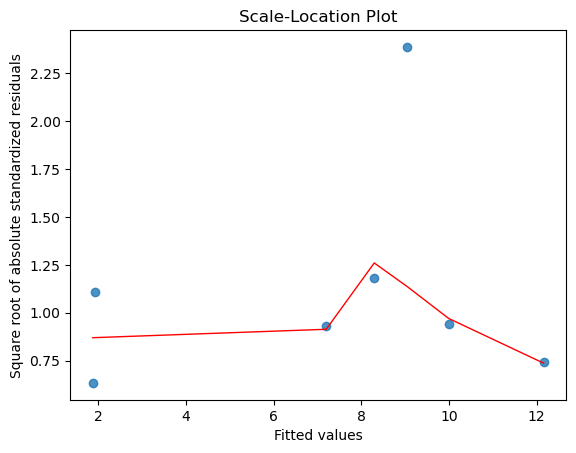

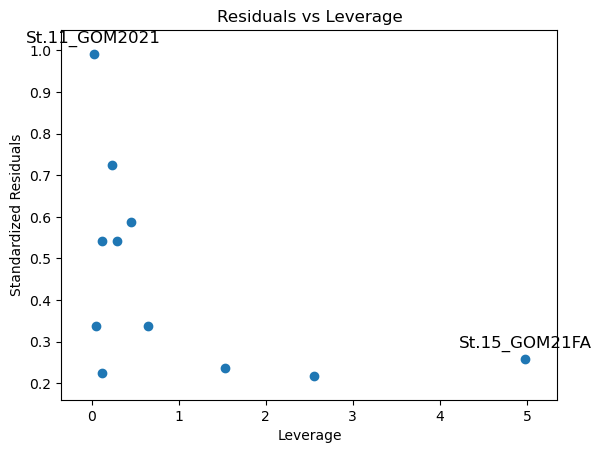

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_472\3215993192.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OM['pred'] = predicted


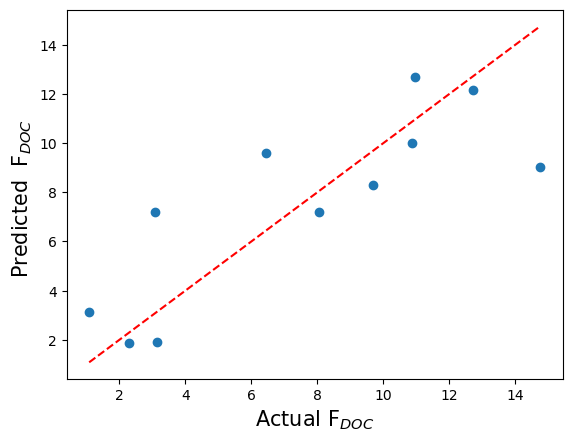

pw_flux_doc = 68.3439 * Intercept + 0.0041 * max_depth + -0.4460 * aou + -0.7153 * NPOC_uM + 0.0051 * aou:NPOC_uM 


In [8]:
# Define the formula for linear regression

Val = 'pw_flux_doc'

formula = 'pw_flux_doc ~ max_depth + aou * NPOC_uM ' 
#percent_doc_resp ' #r=0.683 all ponits significant 
#NPOC_uM ' #r=0.707 CI 95 did not work 
#aou ' #r=0.619

df_OM = combined_df[combined_df['rgn'] == 'slope']

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual F$_{DOC}$ ', size = 15)
plt.ylabel('Predicted  F$_{DOC}$  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Print out the equation nicely
print("pw_flux_doc =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()

In [9]:
df_OM['rgn'].unique()

array(['slope'], dtype=object)

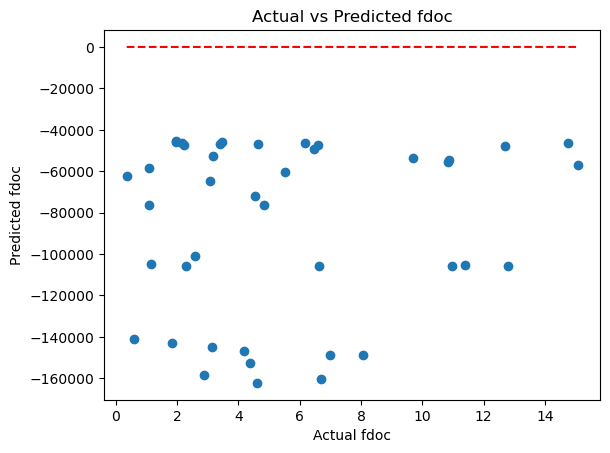

                            OLS Regression Results                            
Dep. Variable:            pw_flux_doc   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.085
Date:                Mon, 17 Jun 2024   Prob (F-statistic):              0.378
Time:                        12:07:03   Log-Likelihood:                -112.87
No. Observations:                  41   AIC:                             235.7
Df Residuals:                      36   BIC:                             244.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [10]:
formula = 'pw_flux_doc ~ temp+aou+NPOC_uM+discharge_mi_ftps_14_day'

df = combined_df

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df).fit()

# Convert relevant columns to numpy arrays
pw_flux_doc = df['pw_flux_doc'].values
temp =  df['temp'].values
discharge_mi_ftps_14_day =  df['discharge_mi_ftps_14_day'].values
aou =  df['aou'].values
NPOC_uM =  df['NPOC_uM'].values


# Assuming interaction terms and so on, you might create a design matrix for predictions:
X = np.column_stack((
    np.ones(pw_flux_doc.shape[0]),  # Intercept
    temp , 
    discharge_mi_ftps_14_day, 
    aou, 
    NPOC_uM
))


# Predict using the model parameters and the design matrix
predicted_a350 = model.params.values.dot(X.T)

# Insert predictions back to dataframe
df['predicted_doc_flux'] = predicted_a350

# Plot
plt.scatter(df['pw_flux_doc'].values, predicted_a350)
plt.xlabel('Actual fdoc')
plt.ylabel('Predicted fdoc')
plt.title('Actual vs Predicted fdoc')
plt.plot([min(df['pw_flux_doc']), max(df['pw_flux_doc'])], 
         [min(df['pw_flux_doc']), max(df['pw_flux_doc'])], 'r--')
plt.show()


# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                NPOC_uM   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     9.593
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           4.93e-05
Time:                        12:13:01   Log-Likelihood:                -224.08
No. Observations:                  50   AIC:                             456.2
Df Residuals:                      46   BIC:                             463.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    263.3615     96.028      2.743      0.0

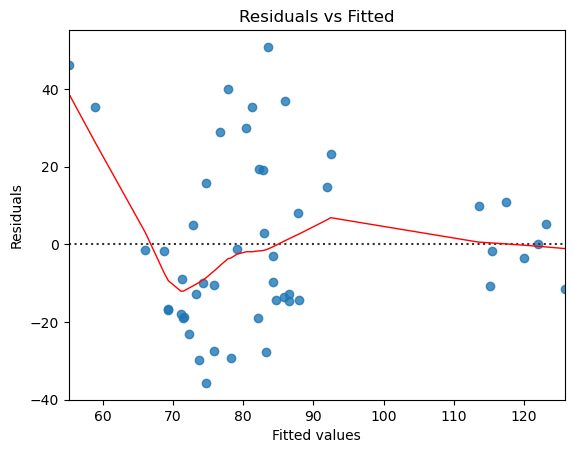

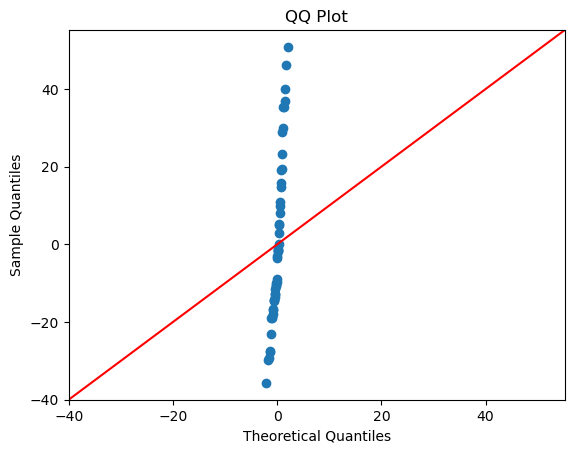

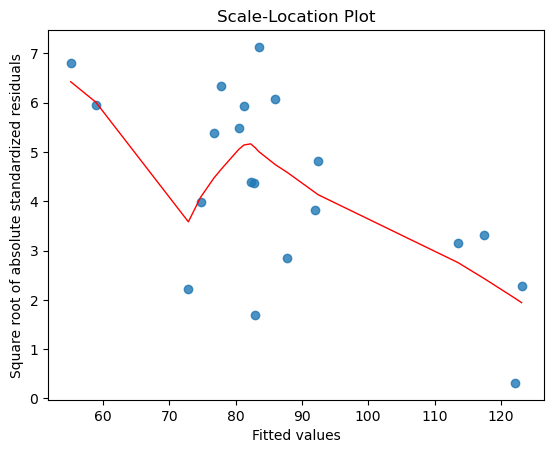

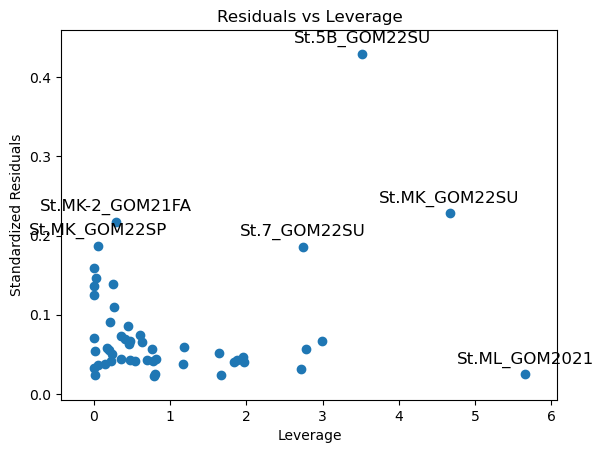

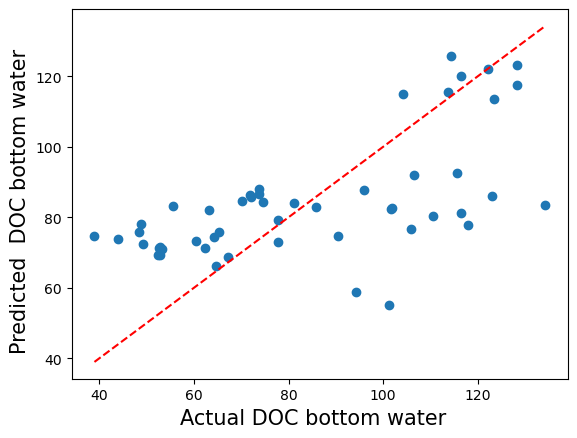

NPOC_uM = 263.3615 * Intercept + -4.5546 * sal + 0.4304 * aou + -0.0182 * sal:aou 


In [12]:
# Define the formula for linear regression

Val = 'NPOC_uM'

formula = 'NPOC_uM ~ sal*aou' 
#formula = 'pw_flux_doc ~ NPOC_uM+aou+doc_mol_per_m3_0_to_5cm+max_depth+distance_to_delta_lat_km' 

#percent_doc_resp ' #r=0.683 all ponits significant 
#NPOC_uM ' #r=0.707 CI 95 did not work 
#aou ' #r=0.619

df_OM = combined_df

# Fit the linear regression model
model = sm.formula.ols(formula=formula, data=df_OM).fit()
print(model.summary())

# Residuals
residuals = model.resid

# Plot 1: Residuals vs Fitted values
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: QQ Plot
sm.qqplot(residuals, line ='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot 3: Scale-Location Plot
sqrt_abs_standardized_resid = abs(residuals**0.5)
sns.regplot(x=model.fittedvalues, y=sqrt_abs_standardized_resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Scale-Location Plot')
plt.xlabel('Fitted values')
plt.ylabel('Square root of absolute standardized residuals')
plt.show()

# Plot 4: Residuals vs Leverage Plot (Cook's distance)
sm.graphics.plot_leverage_resid2(model)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.show()

# Make predictions
predicted = model.predict(df_OM)

# Insert predictions back to dataframe
df_OM['pred'] = predicted

# Plot
plt.scatter(df_OM[Val], predicted)
plt.xlabel(r'Actual DOC bottom water  ', size = 15)
plt.ylabel('Predicted  DOC bottom water  ', size = 15)
plt.title('')
plt.plot([df_OM[Val].min(), df_OM[Val].max()], 
         [df_OM[Val].min(), df_OM[Val].max()], 'r--')
plt.show()

# Extract coefficients and corresponding variables
coefficients = model.params
variables = coefficients.index.tolist()


# Print out the equation nicely
print("NPOC_uM =", end=" ")
for i, (variable, coefficient) in enumerate(zip(variables, coefficients)):
    if i != 0:
        print("+", end=" ")
    print(f"{coefficient:.4f} * {variable}", end=" ")
print()
